In [1]:
import xarray as xr
import fsspec
import numpy as np
import matplotlib.pyplot as plt
from dask.distributed import Client, progress

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:45819 Dashboard: /user/dnowacki@usgs.gov/proxy/8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.11 GB


In [3]:
%%time
# ds = xr.open_zarr(fsspec.get_mapper('s3://pangeo-data-uswest2/esip/NWM2/2017', anon=False, requester_pays=True))
ds = xr.open_zarr(fsspec.get_mapper('s3://esip-qhub/noaa/nwm', anon=False, requester_pays=True))

In [4]:
ds

<xarray.Dataset>
Dimensions:         (feature_id: 2729077, time: 227904)
Coordinates:
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
    latitude        (feature_id) float32 dask.array<chunksize=(2729077,), meta=np.ndarray>
    longitude       (feature_id) float32 dask.array<chunksize=(2729077,), meta=np.ndarray>
  * time            (time) datetime64[ns] 1993-01-01 ... 2018-12-31T23:00:00
Data variables:
    elevation       (time, feature_id) float32 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    order           (time, feature_id) int32 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    qBucket         (time, feature_id) float64 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    q_lateral       (time, feature_id) float64 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    streamflow      (time, feature_id) float64 dask.array<chunksize=(672, 30000), meta=np.ndarray>
    velocity        (time, feature_id) float64 dask.array<chunksize=(672, 30000), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6
    cdm_datatype:               Station
    code_version:               v5.1.0-alpha11
    dev:                        dev_ prefix indicates development/internal me...
    dev_NOAH_TIMESTEP:          3600
    dev_OVRTSWCRT:              1
    dev_channelBucket_only:     0
    dev_channel_only:           0
    featureType:                timeSeries
    model_configuration:        retrospective
    model_initialization_time:  2018-10-01_00:00:00
    model_output_type:          channel_rt
    model_output_valid_time:    2018-12-28_00:00:00
    model_total_valid_times:    2208
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [5]:
reaches = np.sort(np.array([10451190, 10452260, 9175266, 9175254, 14347322, 14352994, 18260325]))

In [12]:
%%time
dsflosup = ds.streamflow.sel(feature_id=reaches).compute()

CPU times: user 25.5 s, sys: 1.85 s, total: 27.4 s
Wall time: 4min 52s


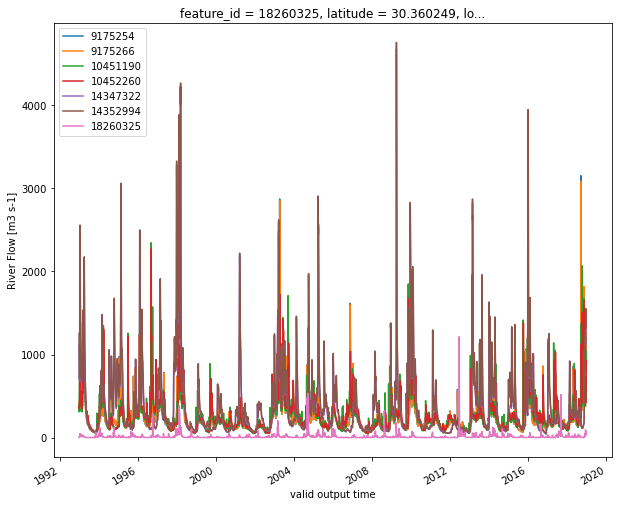

In [13]:
plt.figure(figsize=(10,8))
for reach in reaches:
    dsflosup.sel(feature_id=reach).plot(label=reach)
plt.legend()
plt.show()

In [14]:
dsflosup.to_netcdf('flosup.nc')

In [15]:
print(dsflosup.time[0], dsflosup.time[-1])

<xarray.DataArray 'time' ()>
array('1993-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1993-01-01
Attributes:
    long_name:      valid output time
    standard_name:  time <xarray.DataArray 'time' ()>
array('2018-12-31T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-12-31T23:00:00
Attributes:
    long_name:      valid output time
    standard_name:  time


In [17]:
dsflosup.nbytes/1e6

12.762624